In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('ML471_S2_Datafile_Practice.csv')

# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Remove precomputed smoothing columns if they exist
cols_to_drop = ['SMA_10', 'SMA_30', 'SES']
df.drop([c for c in cols_to_drop if c in df.columns], axis=1, inplace=True)

# Drop rows with NaN in Close_diff (usually the first row)
df.dropna(subset=['Close_diff'], inplace=True)

# Target variable
series = df['Close_diff']

series.head()


Date
2006-02-28    1.090947
2006-03-31   -1.237643
2006-04-30    0.016064
2006-05-31   -0.300550
2006-06-30   -1.345455
Name: Close_diff, dtype: float64

In [2]:
# Split into training and testing sets (80/20 split)
train_size = int(len(series) * 0.8)
train, test = series[0:train_size], series[train_size:len(series)]

print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

Training set size: 104
Testing set size: 27


In [3]:
# Auto-select parameters for MA model (ARIMA(0,0,q))
# We will iterate through q values and select the one with the lowest AIC
best_aic = np.inf
best_q = 0
best_model_fit = None

for q in range(1, 6):
    try:
        model = ARIMA(train, order=(0, 0, q))
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_q = q
            best_model_fit = results
    except:
        continue

print(f"Best MA order (q): {best_q}")
print(f"Best AIC: {best_aic}")

Best MA order (q): 1
Best AIC: 479.59080475577304


C:\Users\kowsh\PycharmProjects\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\kowsh\PycharmProjects\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\kowsh\PycharmProjects\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\kowsh\PycharmProjects\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\kowsh\PycharmProjects\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

In [4]:
# Generate forecasts for the test period
forecast = best_model_fit.forecast(steps=len(test))

# Performance Assessment (Manual calculation)
mae = np.mean(np.abs(test - forecast))
rmse = np.sqrt(np.mean((test - forecast)**2))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")

MAE: 2.8338
RMSE: 3.5176
MAPE: 101.6113%


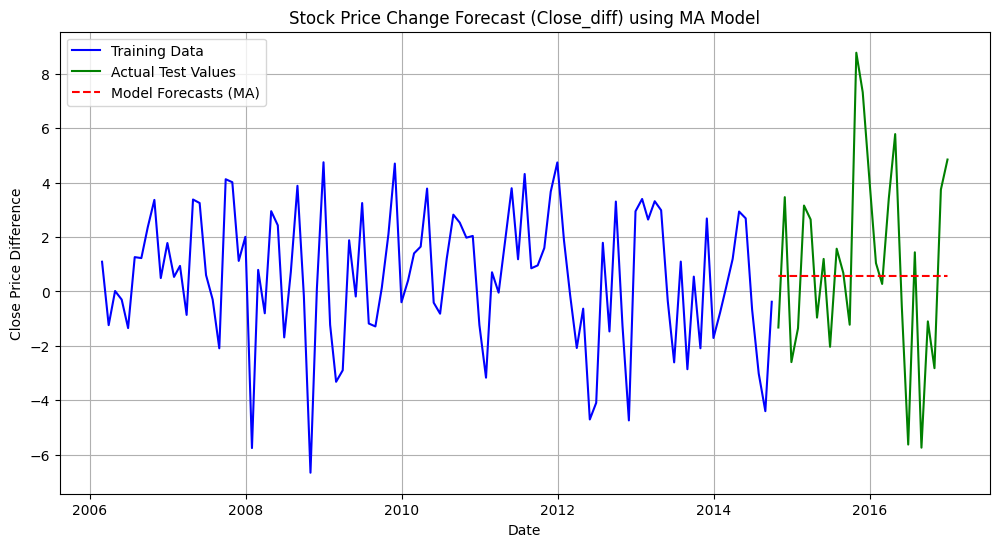

In [5]:
# Visual Evaluation
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Values', color='green')
plt.plot(test.index, forecast, label='Model Forecasts (MA)', color='red', linestyle='--')
plt.title('Stock Price Change Forecast (Close_diff) using MA Model')
plt.xlabel('Date')
plt.ylabel('Close Price Difference')
plt.legend()
plt.grid(True)
plt.show()